# Covid19 Data Analysis Notebook
------------------------------------------

### Import the modules 

In [132]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

### importing covid19 dataset


In [133]:
confirmed_cases = pd.read_csv('data/covid19_Confirmed_dataset.csv', header=0, parse_dates=True)
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [134]:
confirmed_cases.shape # 266 rows and 104 columns

(266, 104)

### Dropping the unwanted columns

In [135]:
col = confirmed_cases.columns  
print(col)  #Latitude and Longitude are not important features for us here

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)


In [136]:
column_to_drop = ['Lat', 'Long', 'Province/State']
confirmed_cases.drop(column_to_drop, axis=1, 
    inplace = True)  # will change the dataset too if True

### Aggregating the rows by the country

In [137]:
covid_data_grouped = confirmed_cases.groupby('Country/Region').sum()
covid_data_grouped.head()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [138]:
df = covid_data_grouped
df.shape # We now have 187 Countries and 100 dates

(187, 100)

In [139]:
df.filter(regex='India',axis = 0).head() # filter the column that you're looking for

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0,0,0,0,0,0,0,0,1,1,...,20080,21370,23077,24530,26283,27890,29451,31324,33062,34863


### Visualizing data related to a country for example India

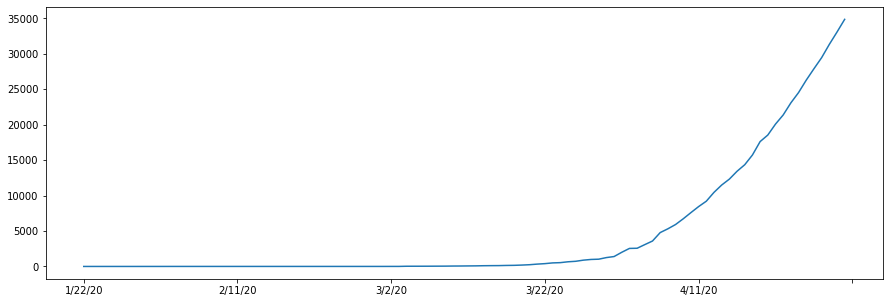

In [140]:
df.loc['India'].plot(figsize=(15,5))

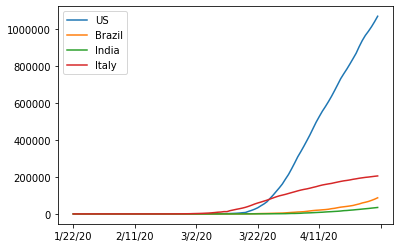

In [141]:
df.loc['US'].plot()
df.loc['Brazil'].plot()
df.loc['India'].plot()
df.loc['Italy'].plot()
plt.legend()


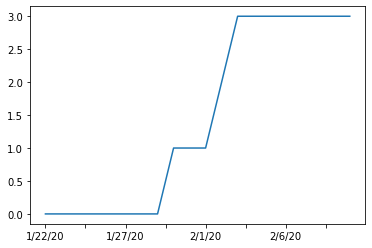

In [142]:
#Spread of the virus in India for the first 20 dates only
df.loc['India'][:20].plot()

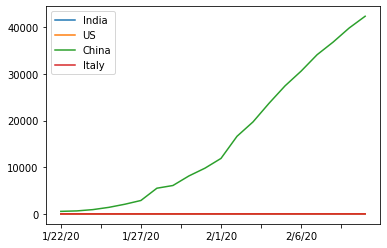

In [143]:
df.loc['India'][:20].plot()
df.loc['US'][:20].plot()
df.loc['China'][:20].plot()
df.loc['Italy'][:20].plot()
plt.legend()

### Caculating the first derivative of the curve

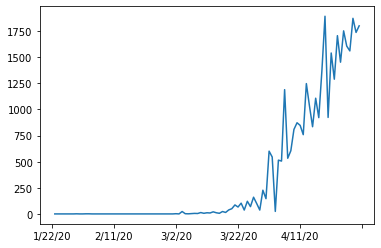

In [144]:
df.loc['India'].diff().plot() #We want to find a measure for new cases, so either say average or maximum number of new cases

### Find maxmimum infection rate for India

In [145]:
df.loc['India'].diff().max()

1893.0

In [146]:
df.loc['US'].diff().max()

36188.0

In [147]:
df.loc['Italy'].diff().max()

6557.0

In [148]:
df.loc['United Kingdom'].diff().max()

8733.0

### Find maximum infection rate for all of the countries. 

In [149]:
countries = list(df.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(df.loc[c].diff().max())
max_infection_rates

[232.0,
 34.0,
 199.0,
 43.0,
 5.0,
 6.0,
 291.0,
 134.0,
 497.0,
 1321.0,
 105.0,
 7.0,
 301.0,
 641.0,
 12.0,
 1485.0,
 2454.0,
 4.0,
 19.0,
 1.0,
 104.0,
 92.0,
 7.0,
 7502.0,
 26.0,
 137.0,
 41.0,
 21.0,
 6.0,
 45.0,
 31.0,
 203.0,
 2778.0,
 31.0,
 21.0,
 1138.0,
 15136.0,
 353.0,
 1.0,
 57.0,
 81.0,
 37.0,
 113.0,
 96.0,
 63.0,
 58.0,
 381.0,
 391.0,
 99.0,
 156.0,
 5.0,
 371.0,
 11536.0,
 269.0,
 32.0,
 130.0,
 7.0,
 134.0,
 20.0,
 9.0,
 5.0,
 267.0,
 26849.0,
 38.0,
 5.0,
 42.0,
 6933.0,
 403.0,
 156.0,
 6.0,
 68.0,
 167.0,
 132.0,
 12.0,
 10.0,
 3.0,
 72.0,
 210.0,
 99.0,
 1893.0,
 436.0,
 3186.0,
 91.0,
 1515.0,
 1131.0,
 6557.0,
 52.0,
 1161.0,
 40.0,
 264.0,
 29.0,
 851.0,
 289.0,
 300.0,
 69.0,
 3.0,
 48.0,
 61.0,
 17.0,
 13.0,
 21.0,
 90.0,
 234.0,
 7.0,
 14.0,
 10.0,
 235.0,
 190.0,
 58.0,
 52.0,
 2.0,
 41.0,
 1425.0,
 222.0,
 12.0,
 13.0,
 30.0,
 281.0,
 19.0,
 3.0,
 14.0,
 1346.0,
 89.0,
 2.0,
 69.0,
 208.0,
 107.0,
 386.0,
 144.0,
 1292.0,
 357.0,
 5.0,
 27.0,
 3683.0,

In [150]:
df['max_infection_rates'] = max_infection_rates
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


### Creating a new dataframe with only needed column 

In [151]:
covid_data = pd.DataFrame(df['max_infection_rates'])

In [152]:
covid_data.head()

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


### 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Importing the dataset

In [153]:
happy_data = pd.read_csv('data/worldwide_happiness_report.csv')

In [154]:
happy_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### let's drop the useless columns 

In [155]:
cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [156]:
happy_data.drop(cols, axis = 1, inplace = True)
happy_data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Changing the indices of the dataframe

In [157]:
happy_data.set_index('Country or region', inplace = True)
happy_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


### now let's join two dataset 

#### Corona Dataset 

In [158]:
covid_data.shape    # 187 rows and 1 column

(187, 1)

#### World happiness report Dataset 

In [159]:
happy_data.shape  # 156 rows and 4 columns

(156, 4)

In [160]:
data = covid_data.join(happy_data, how = 'inner')
data.head()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


In [161]:
data.count().isnull()

max_infection_rates             False
GDP per capita                  False
Social support                  False
Healthy life expectancy         False
Freedom to make life choices    False
dtype: bool

### Creating a correlation matrix 

In [162]:
corr = data.corr
print(corr)  # There is positive correlation between max_infection-rate and all other features

<bound method DataFrame.corr of              max_infection_rates  GDP per capita  Social support  \
Afghanistan                232.0           0.350           0.517   
Albania                     34.0           0.947           0.848   
Algeria                    199.0           1.002           1.160   
Argentina                  291.0           1.092           1.432   
Armenia                    134.0           0.850           1.055   
...                          ...             ...             ...   
Venezuela                   29.0           0.960           1.427   
Vietnam                     19.0           0.741           1.346   
Yemen                        5.0           0.287           1.163   
Zambia                       9.0           0.578           1.058   
Zimbabwe                     8.0           0.366           1.114   

             Healthy life expectancy  Freedom to make life choices  
Afghanistan                    0.361                         0.000  
Albania      

### Visualizating the results

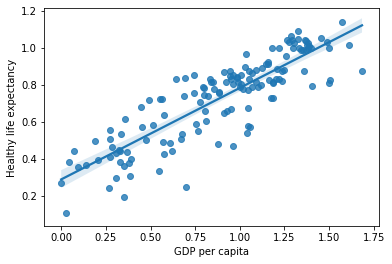

In [163]:
x = data['GDP per capita']
y = data['Healthy life expectancy']
sns.regplot(x,y)  #GDP per capita is a good representation of a country's standard of living

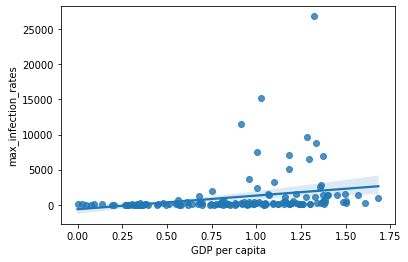

In [164]:
a = data['GDP per capita']
b = data['max_infection_rates']
sns.regplot(a, b) # There is no positive correlation between GDP per capita and max infection rates of countries
                    # Although we could scale max_infection_rates but there should be no correlation between the two

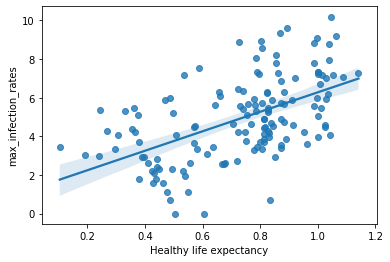

In [165]:
n = data['max_infection_rates']
m = data['Healthy life expectancy']
sns.regplot(m,np.log(n))  # scaling max infection rates and there seems to be a postive correlation between the two